# Exercise 3 MD Simulation

## Exersise 3. 1 
Make sure that velocity verlet algorithm is more accurate than euler algorithm.

In [1]:
import numpy
import matplotlib.pyplot as plt

### Functions definitions

In [2]:
#Initialization of velocities and positions of particles
def init(n_particles, L_sys, Temp):
    numpy.random.seed(1292)
    position = L_sys*numpy.random.rand(n_particles, 3)
    velosity = numpy.random.normal(0, 3.*Temp, (n_particles, 3))
    
    v_ave = sum(velosity)/n_particles
    velosity -= v_ave
    v_variance = numpy.var(velosity, axis = 0)
    velosity *= (3*Temp/sum(v_variance))**0.5

    return position, velosity

In [3]:
#Determine the forces of LJ potential
def force(position, L_sys):
    energy_p = 0.
    n_par = len(position)
    rc2 = 2.**(1./3.)
    forces = numpy.zeros((n_par, 3))
    for i in xrange(n_par - 1):
        for j in xrange(i + 1, n_par):
            r  = position[i] - position[j]
            r -= L_sys*numpy.rint(r/L_sys) #Periodic boundary conditions
            r2 = numpy.sum(numpy.square(r))
            if r2 < rc2:
                r2i = 1./r2
                r6i = r2i**3
                ff = 48.*r2i*r6i*(r6i - 0.5)
                r *= ff
                forces[i] += r
                forces[j] -= r
                energy_p += 4.*r6i*(r6i - 1.) + 1.
    return forces, energy_p

In [4]:
def velocity_verlet(position, velocity, forces, L_sys, dt):
    position = position + dt*velocity
    position += 0.5*dt**2*forces
    position = (position + 2.*L_sys)%L_sys #Periodic boundary conditions
    velocity += 0.5*dt*forces
    forces, energy_p = force(position, L_sys)
    velocity += 0.5*dt*forces
    energy_k = 0.5*sum(sum(numpy.square(velocity)))
    return position, velocity, forces, energy_k, energy_p

In [5]:
def euler(position, velocity, forces, L_sys, dt):
    forces, energy_p = force(position, L_sys)
    position = position + dt*velocity
    position = (position + 2.*L_sys)%L_sys #Periodic boundary conditions
    velocity += dt*forces
    energy_k = 0.5*sum(sum(numpy.square(velocity)))
    return position, velocity, forces, energy_k, energy_p

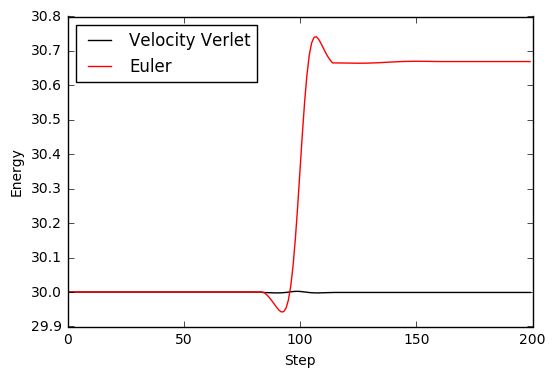

In [7]:
#Parameter setting
n_particles = 20     #The number of particles
L_sys       = 10.    #The length of system
Temperature = 1.     #The temperature of system
dt          = 0.005  #The incremantation of the time per step
n_step      = 200   #The total time step

#Initialization
position, velocity = init(n_particles, L_sys, Temperature)
forces, energy_p = force(position, L_sys)

data_velocity_verlet = []
#MD loop of velocity verlet algorithm
for i in xrange(n_step):
    position, velocity, forces, energy_k, energy_p = velocity_verlet(position, velocity, forces, L_sys, dt)
    data_velocity_verlet.append(energy_k + energy_p)

position, velocity = init(n_particles, L_sys, Temperature)
forces, energy_p = force(position, L_sys)

data_euler = []
#MD loop of euler algorithm
for i in xrange(n_step):
    position, velocity, forces, energy_k, energy_p = euler(position, velocity, forces, L_sys, dt)
    data_euler.append(energy_k + energy_p)

#Drawing the graph
plt.xlabel('Step')
plt.ylabel('Energy')
plt.plot(data_velocity_verlet, 'k', label=b'Velocity Verlet')
plt.plot(data_euler, 'r', label=b'Euler')
plt.legend(loc='upper left')
plt.show()

## Exercise 3. 2 
Demonstrate that velocity verlet algorithm satifies the symplectic condition.